<a href="https://colab.research.google.com/github/BernasconiLorenzo06/PANDAS_FILE/blob/main/Bernasconi_Lorenzo_3E_recupero_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import pandas


import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
studenti = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Bernasconi Lorenzo - ds1880_studenti_scuola_secondaria_2grado_sudd_indirizzo_statale_as_2020_2021.csv', sep = ";")
studenti.head(1)

,ANNOSCOLASTICO,CODICESCUOLA,INDIRIZZOSCUOLA,DenominazioneIstitutoRiferimento,DenominazioneScuola,CAPSCUOLA,PERCORSO,INDIRIZZOSCOLASTICA,ALUNNIMASCHI,ALUNNIFEMMINE
0,202021,MITD02201P,VIA ULISSE DINI 7,SALVADOR ALLENDE,CUSTODI,20141,ECONOMICO,AMMINISTRAZIONE FINANZA E MARKETING - TRIENNIO,9,10


In [ ]:
stuxmaschio_sum = studenti.groupby("PERCORSO")[["ALUNNIMASCHI"]].sum().reset_index()
stuxmaschio_sum

In [ ]:
stuxfemmina_sum = studenti.groupby("PERCORSO")[["ALUNNIFEMMINE"]].sum().reset_index()
stuxfemmina_sum

In [ ]:
unito = stuxmaschio_sum.merge(stuxfemmina_sum, on = 'PERCORSO')
unito

In [ ]:
stuxtip = studenti.groupby('PERCORSO')[['ALUNNIFEMMINE']].count().sort_values(by = "ALUNNIFEMMINE", ascending =  False).reset_index()
stuxtip

In [ ]:
stuxtip_es2 = studenti.groupby('PERCORSO')[['ALUNNIFEMMINE']].count().sort_values(by = "ALUNNIFEMMINE").reset_index()
stuxtip_es2

1. Visualizzare il grafico a barre verticali degli studenti per ogni tipologia di percorso

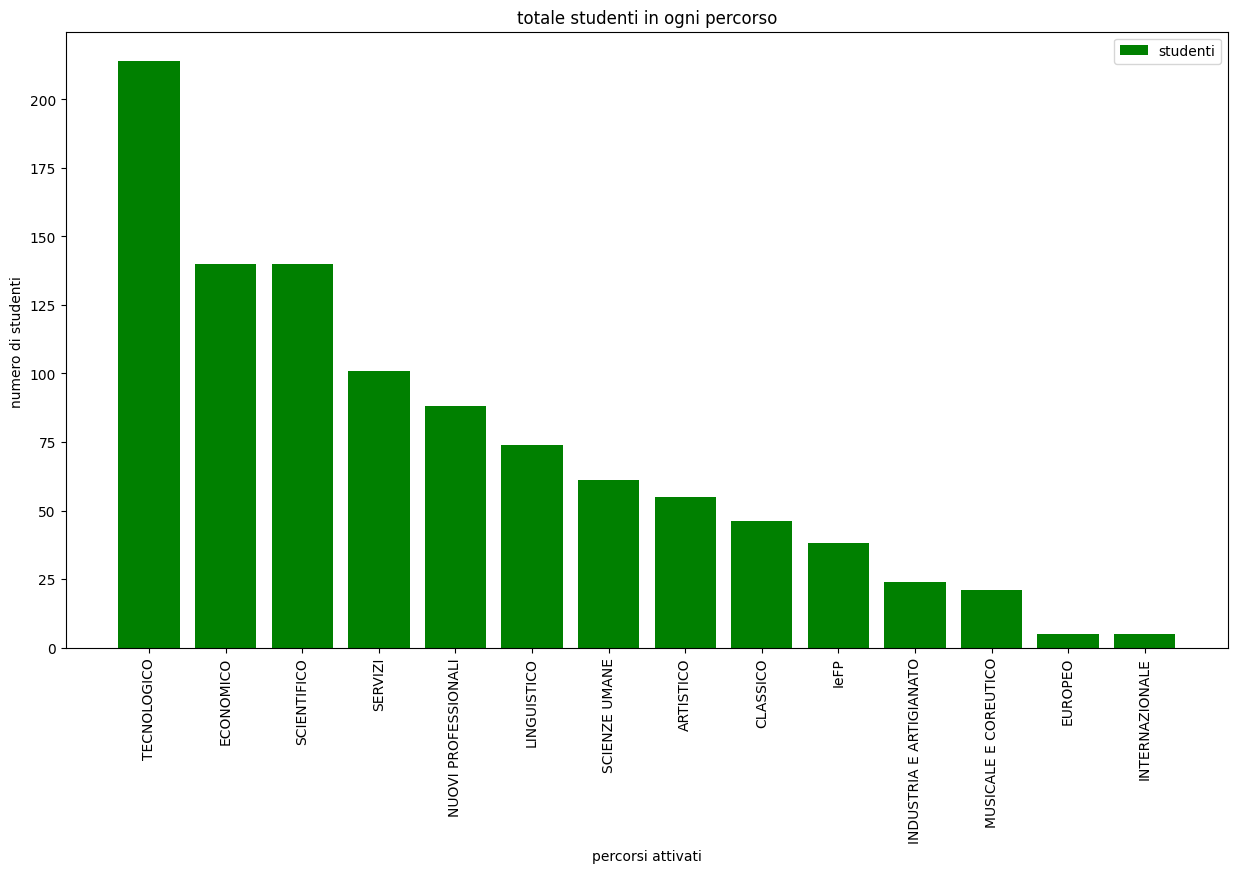

In [ ]:
ascisse = stuxtip['PERCORSO']
ordinate = stuxtip['ALUNNIFEMMINE']

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ascisse, ordinate, label='studenti', color = ["green"])

plt.xticks(rotation='vertical')
ax.set_ylabel('numero di studenti ')
ax.set_xlabel('percorsi attivati')
ax.set_title('totale studenti in ogni percorso')
ax.legend()


2 . Visualizzare gli stessi dati di prima con un grafico a barre orizzontali

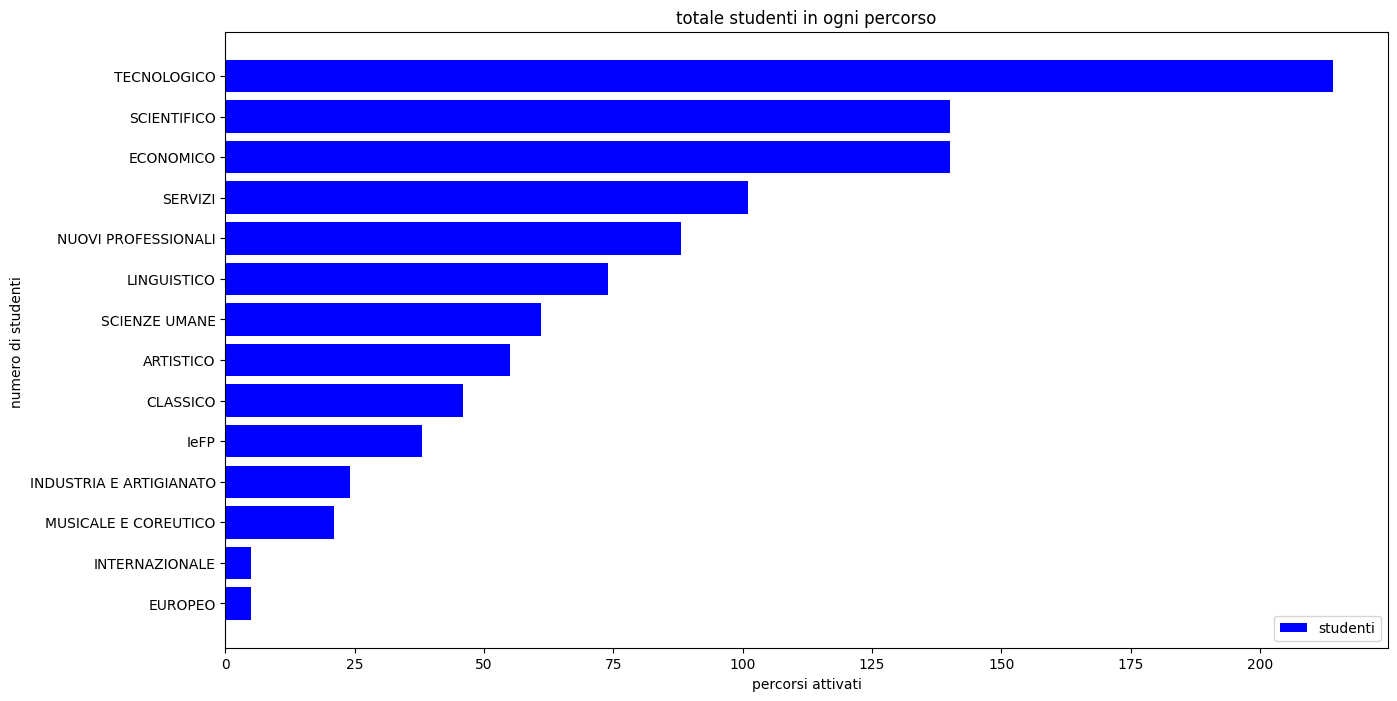

In [ ]:
ascisse = stuxtip_es2['PERCORSO']
ordinate = stuxtip_es2['ALUNNIFEMMINE']

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(ascisse, ordinate, label='studenti', color = ["blue"])

ax.set_ylabel('numero di studenti ')
ax.set_xlabel('percorsi attivati')
ax.set_title('totale studenti in ogni percorso')
ax.legend()


3. cambiare i colori del grafico precedente in modo che siano come quelli del grafico seguente

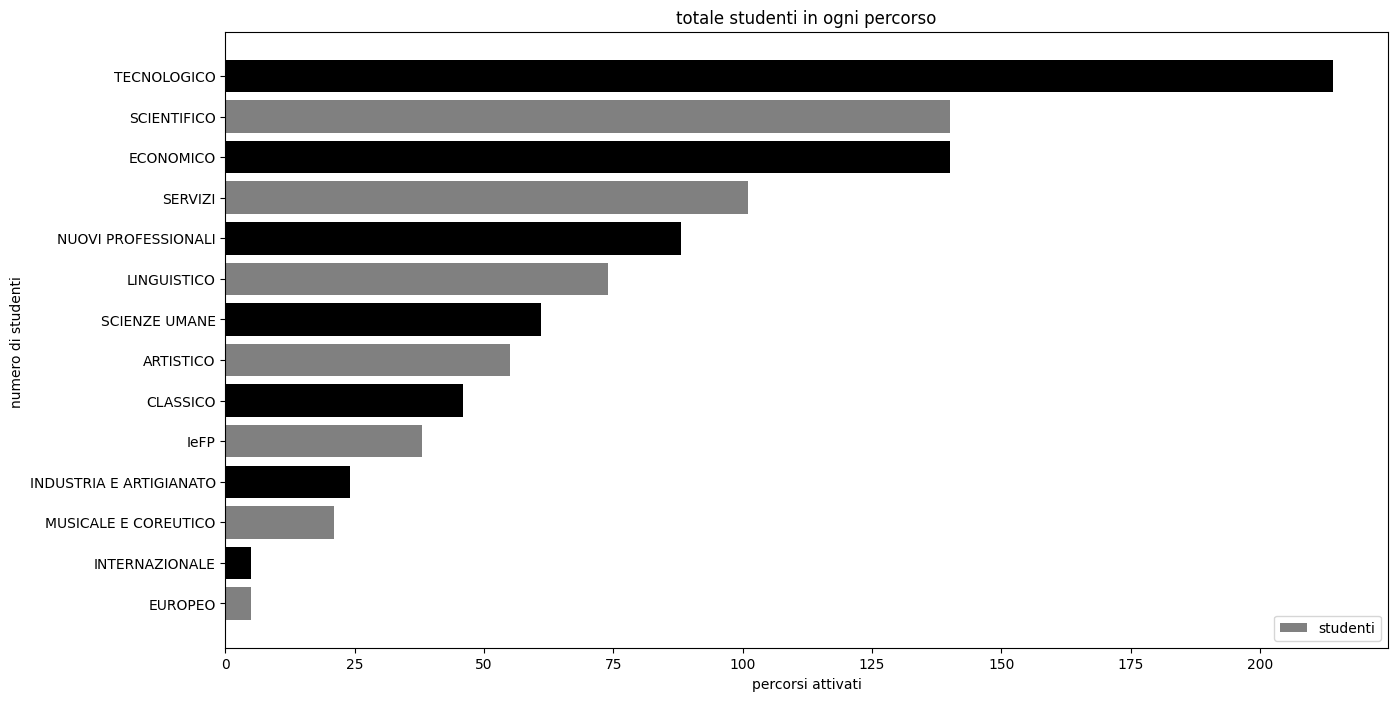

In [ ]:
ascisse = stuxtip_es2['PERCORSO']
ordinate = stuxtip_es2['ALUNNIFEMMINE']

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(ascisse, ordinate, label='studenti', color = ["grey","black"])

ax.set_ylabel('numero di studenti ')
ax.set_xlabel('percorsi attivati')
ax.set_title('totale studenti in ogni percorso')
ax.legend()


4. Visualizzare gli stessi dati dellìesercizio precedente con un grafico a torta

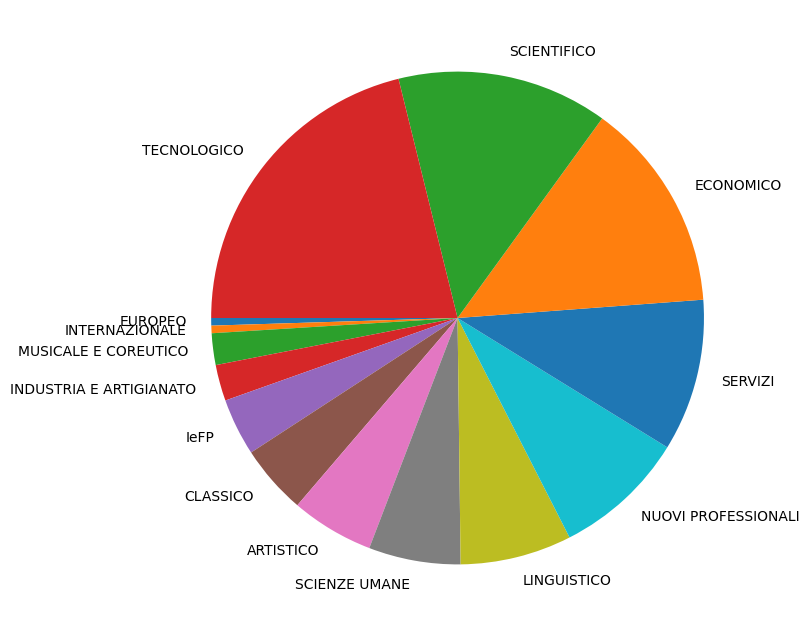

In [ ]:
ascisse = stuxtip_es2['PERCORSO']
ordinate = stuxtip_es2['ALUNNIFEMMINE']


plt.figure(figsize=(16, 8))
plt.pie(ordinate, labels=ascisse, startangle=180)
plt.show()

5. Aggiungere al grafico a torta le percentuali e ruotare il grafico come da disegno

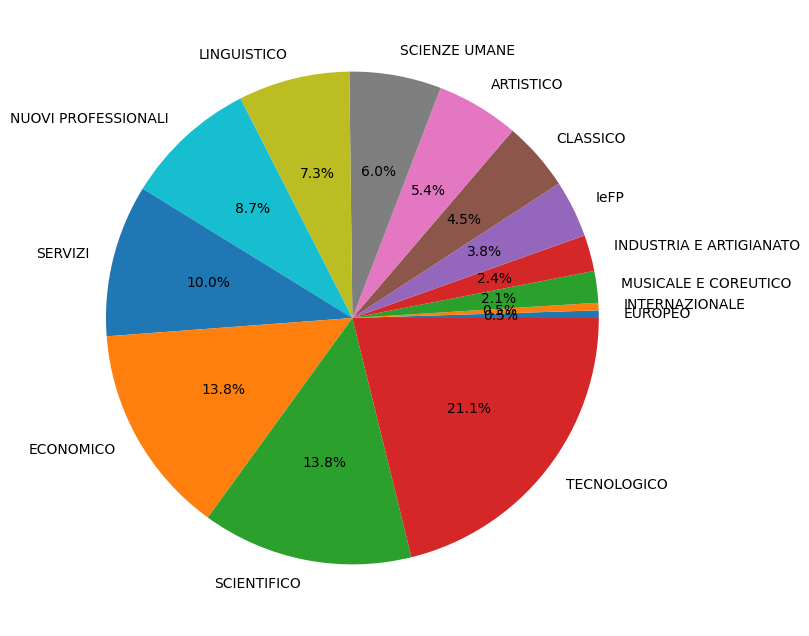

In [ ]:
ascisse = stuxtip_es2['PERCORSO']
ordinate = stuxtip_es2['ALUNNIFEMMINE']


plt.figure(figsize=(16, 8))
plt.pie(ordinate, labels=ascisse, autopct='%1.1f%%',startangle=0)
plt.show()

6. Visualizzare il grafico a barre verticali del numero di studenti maschi e femmine per ogni percorso di studi

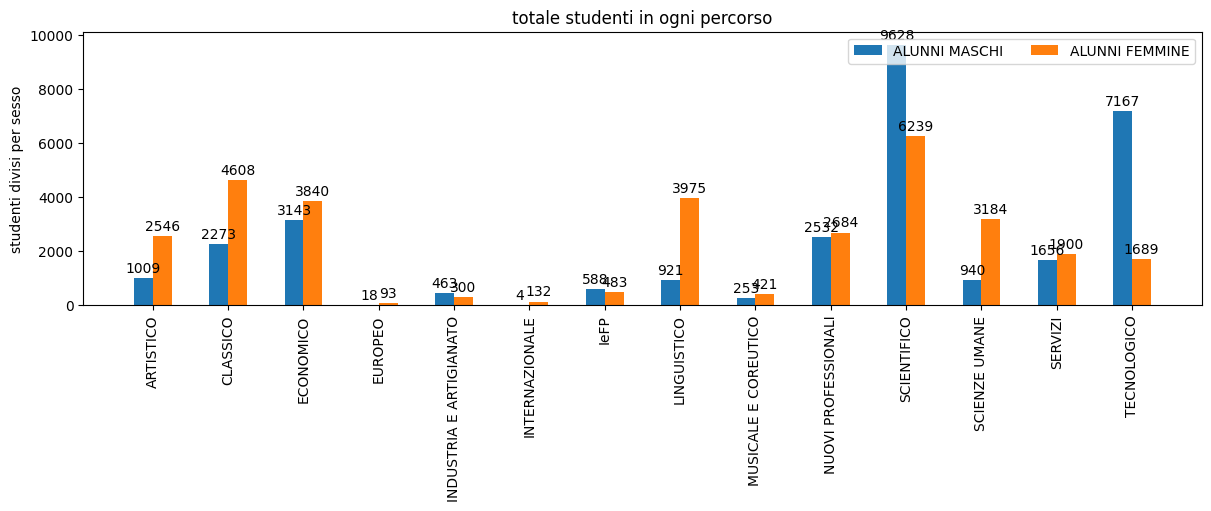

In [ ]:
stringhe = unito['PERCORSO']
dati = {
    "ALUNNI MASCHI": np.array(unito['ALUNNIMASCHI']),
    "ALUNNI FEMMINE": np.array(unito['ALUNNIFEMMINE'])
}

x = np.arange(len(stringhe))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize = (12, 5))

for nome, valore in dati.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valore, width, label=nome)
    ax.bar_label(rects, padding=2)
    multiplier += 1


plt.xticks(rotation='vertical')
ax.set_ylabel('studenti divisi per sesso')
ax.set_title('totale studenti in ogni percorso')
ax.set_xticks(x + width, stringhe)
ax.legend(loc='upper right', ncols=2)

plt.show()

7. Visualizzare gli stessi dati con un grafico a barre orizzontali

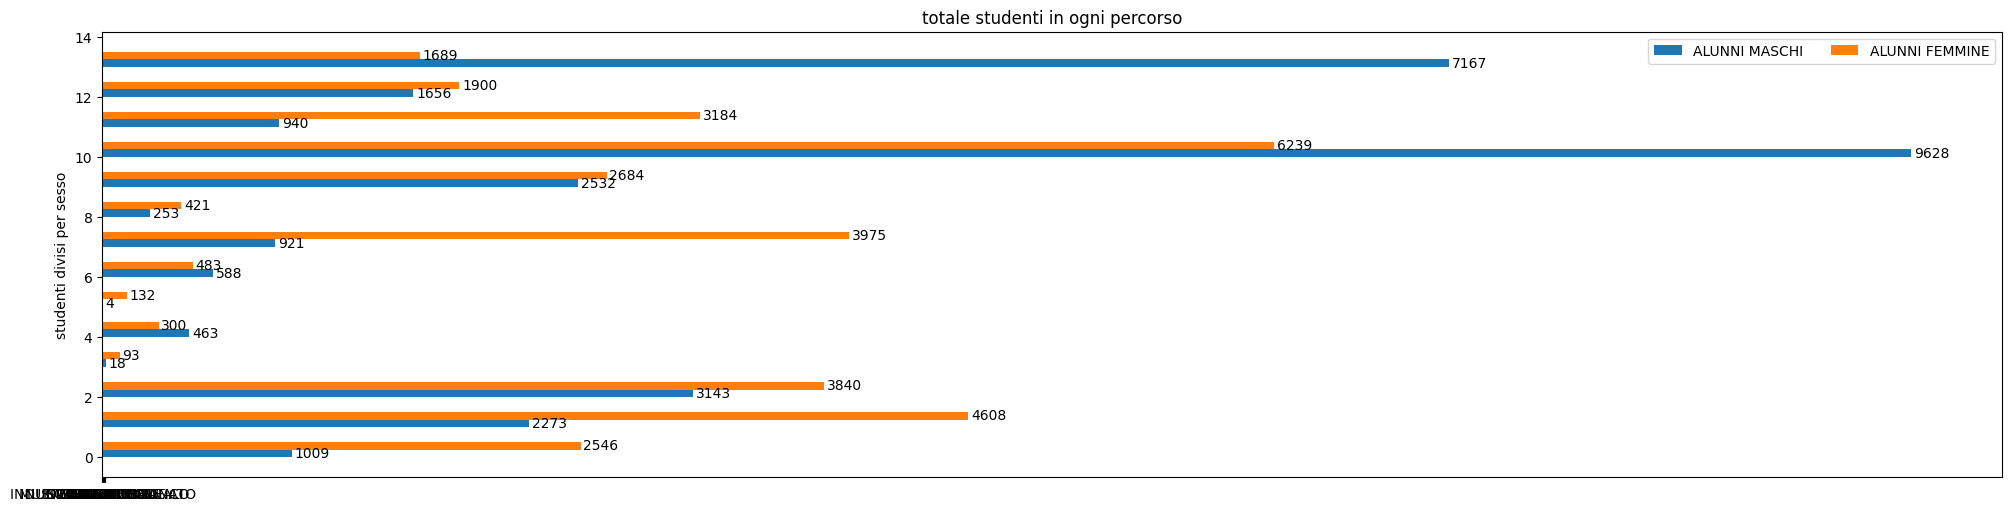

In [ ]:
stringhe = unito['PERCORSO']
dati = {
    "ALUNNI MASCHI": np.array(unito['ALUNNIMASCHI']),
    "ALUNNI FEMMINE": np.array(unito['ALUNNIFEMMINE'])
}

x = np.arange(len(stringhe))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize = (20, 5))

for nome, valore in dati.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, valore, width, label=nome)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('studenti divisi per sesso')
ax.set_title('totale studenti in ogni percorso')
ax.set_xticks(x + width, stringhe)
ax.legend(loc='upper right', ncols=2)

plt.show()